# Laboratorium 3 (Część I) - Histogram obrazu, transformacja Fouriera

W ramach laboratorium zostaną zaimplementowane podstawowe operacje na histogramie obrazu oraz zostanie wykorzystana transformacja Fouriera obrazu (sygnału 2D)

Zacznijmy od wczytania bibliotek oraz obrazu:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
%matplotlib inline

image = color.rgb2gray(io.imread("xray.jpg"))
image = (image - np.min(image)) / (np.max(image) - np.min(image))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  import sys


Wyznaczmy i obliczmy histogram wczytanego obrazu. Zauważ, że histogram może zostać zwizualizowany w najróżniejszy sposób, nie tylko poprzez wykres słupkowy.

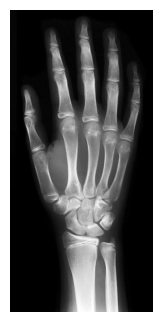

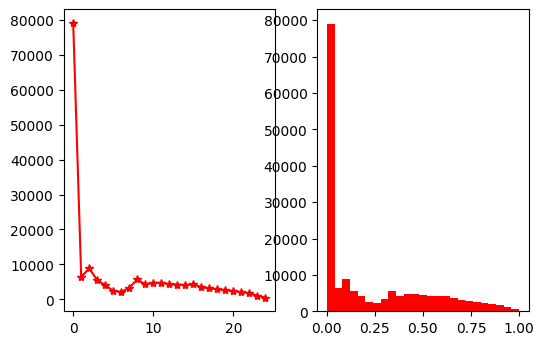

In [ ]:
no_bins = 25
np_histogram, _ = np.histogram(image.ravel(), bins=no_bins)

plt.figure(dpi=100)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')


plt.figure(dpi=100)
plt.subplot(1, 2, 1)
plt.plot(np_histogram, "r*-")

plt.subplot(1, 2, 2)
plt.hist(image.ravel(), color='red', bins=no_bins)
plt.show()

W pierwszym zadaniu napisz własną funckję do obliczania histogramu. Nie używaj gotowych funkcji wyznaczających histogram z żadnej z bibliotek.

In [ ]:
def our_hist(image, bins=100):
    
    unique, counts = np.unique(image, return_counts =True)

    unique = unique.astype("float32")
    hist = np.zeros(len(counts))
    no_bin = 0
    idx = 0
    val_bin = unique.max()/bins

    for i in range(len(counts)):

      if unique[i] < val_bin:
        hist[no_bin] = np.sum(counts[idx:i+1])
      else:
        val_bin += 1/bins
        no_bin += 1
        idx = i
    
    return hist[hist!=0].astype('int64')

[79056  6424  8874  5486  4106  2448  2139  3359  5705  4325  4748  4739
  4388  4253  4127  4292  3551  3139  2926  2656  2411  2080  1792  1078
   534]
[79056  6424  8874  5486  4106  2448  2139  3359  5705  4325  4748  4739
  4388  4253  4127  4292  3551  3139  2926  2656  2411  2080  1792  1078
   534]


Porównaj działanie zaimplementowanej funkcji do funkcji dostępnej w bibliotece numpy:

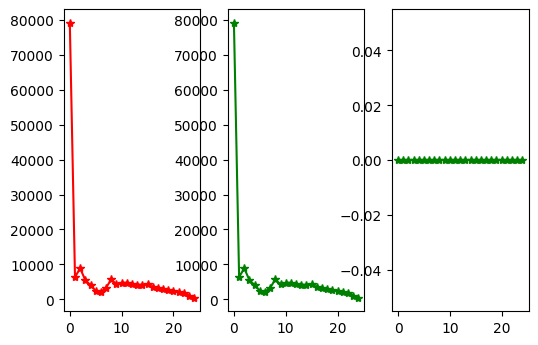

SAD:  0


In [ ]:
our_histogram = our_hist(image.ravel(), bins=25)

plt.figure(dpi=100)
plt.subplot(1, 3, 1)
plt.plot(np_histogram, "r*-")
plt.subplot(1, 3, 2)
plt.plot(our_histogram, "g*-")
plt.subplot(1, 3, 3)
plt.plot(np.abs(np_histogram.ravel() - our_histogram), "g*-")
plt.show()

print("SAD: ", np.sum(np.abs(np_histogram.ravel() - our_histogram)))

W kolejnym zadaniu napisz funkcję do wyrównania histogramu (bez użycia gotowej funkcji bibliotecznej).

In [ ]:
def histogram_equalization(image, bins=100):
		
		unique, counts = np.unique(image, return_counts=True)
		cdf = np.cumsum(counts)
		cdf = cdf/cdf[-1] #normalizacja

		equal_hist = np.interp(image.ravel(), np.arange(0, 1, 1/len(counts)), cdf).reshape(image.shape)
 
		return equal_hist

[[0.43234513 0.43234513 0.43234513 ... 0.31523518 0.31523518 0.31523518]
 [0.43234513 0.43234513 0.43234513 ... 0.31523518 0.31523518 0.31523518]
 [0.43234513 0.43234513 0.43234513 ... 0.31523518 0.31523518 0.31523518]
 ...
 [0.31523518 0.31523518 0.31523518 ... 0.31523518 0.31523518 0.31523518]
 [0.31523518 0.31523518 0.31523518 ... 0.31523518 0.31523518 0.31523518]
 [0.31523518 0.31523518 0.31523518 ... 0.31523518 0.31523518 0.31523518]]


Przykładowy rezultat:

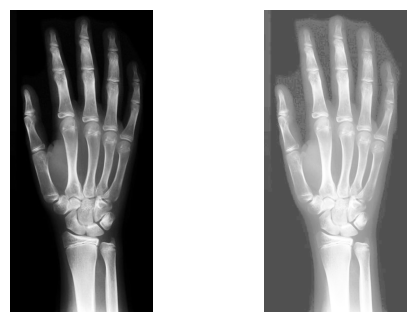

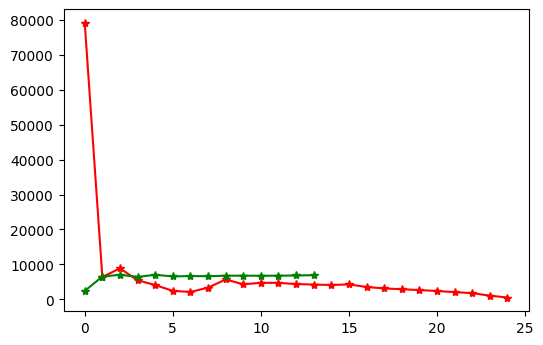

In [ ]:
no_bins=25
equalized_image = histogram_equalization(image, bins=no_bins)

plt.figure(dpi=100)

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')

plt.figure(dpi=100)
plt.plot(our_hist(image, bins=no_bins), "r*-")
plt.plot(our_hist(equalized_image, bins=no_bins), "g*-")
plt.show()


W kolejnym kroku napisz funkcję do dopasowania histogramów (bez użycia gotowej funkcji bibliotecznej):

In [ ]:
def histogram_matching(image_1, image_2): # from image_1 to image_2
    _, counts_1 = np.unique(image_1.ravel(), return_counts=True)
    cdf_1 = np.cumsum(counts_1)
    cdf_1 = cdf_1/cdf_1[-1]

    _, counts_2 = np.unique(image_2.ravel(), return_counts=True)
    cdf_2 = np.cumsum(counts_2)
    cdf_2 = cdf_2/cdf_2[-1]

    to_match = np.interp(image_2.ravel(), np.arange(0, 1, 1/len(counts_2)), cdf_2)
    matched = np.interp(to_match, cdf_1, np.arange(0, 1, 1/len(counts_1)))

    return matched.reshape(image_1.shape)

I przetestuj jej działanie:

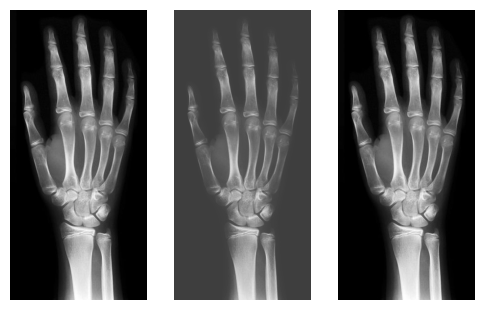

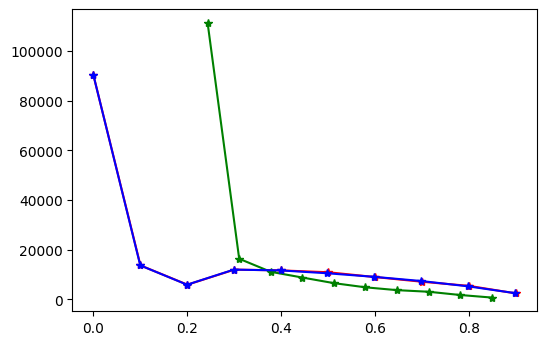

In [ ]:
normalize = lambda image: (image - np.min(image)) / (np.max(image) - np.min(image))
new_image = 0.672*image**2 + 0.243
matched_image = histogram_matching(image, new_image)

plt.figure(dpi=100)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(new_image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(matched_image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')

plt.figure(dpi=100)
hist, bins = np.histogram(image)
new_hist, new_bins = np.histogram(new_image)
matched_hist, matched_bins = np.histogram(matched_image)
plt.plot(bins[:-1], hist, "r*-")
plt.plot(new_bins[:-1], new_hist, "g*-")
plt.plot(matched_bins[:-1], matched_hist, "b*-")
# Histogram czerwony pokrywa się z niebieskim, co jest wynikiem oczekiwanym
plt.show()

Ciekawostka: dopasowanie histogramu jest bardzo prymitywną, globalną metodą korekcji/nakładania stylu. Obecnie metody poszły zdecydowanie "do przodu", np. stosowane są nieliniowe metody uczenia głębokiego, m.in. oparte o sieci generujące.
Polecam przeczytanie np. https://towardsdatascience.com/style-transfer-with-gans-on-hd-images-88e8efcf3716

Kolejnym zadaniem jest zastosowanie i wizualizacja transformacji Fouriera obrazu. Stosując gotowe funkcje biblioteczne dokonaj następujących transformacji:

In [ ]:
image_fft = np.fft.fft2(image)
fft_mag = 20*np.log(np.abs(np.fft.fftshift(image_fft)))
image_back = np.abs(np.fft.ifft2(np.fft.ifftshift(np.fft.fftshift(image_fft))))# TO DO # Transformacja odwrotna

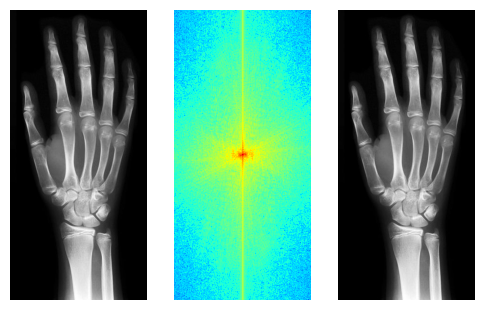

In [ ]:
plt.figure(dpi=100)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(fft_mag, cmap='jet')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(image_back, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()

Na koniec spróbuj tak zmodyfikować widmo by uzyskać rezultat podobny do poniższego. Wytłumacz intuicyjnie co się stało.

In [ ]:
rows, cols = image.shape
crow, ccol = int(rows/2) , int(cols/2)

image_fft = np.fft.fft2(image) # TO DO - modify image_fft
fshift = np.fft.fftshift(image_fft)

fshift[crow-10:crow+20, ccol-10:ccol+10] = 0

fft_mag = 20*np.log(np.abs(fshift))
image_back = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


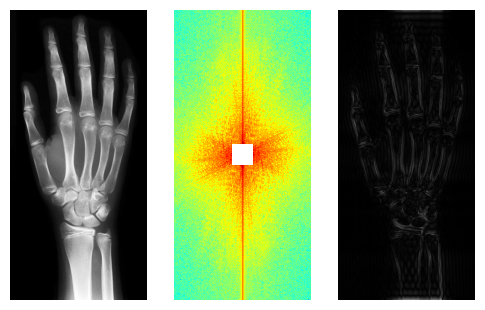

In [ ]:
plt.figure(dpi=100)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(fft_mag, cmap='jet')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(image_back, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()


Komentarz:

Nie poświęcamy wiele czasu operacjom w przestrzeni Fouriera. Obecnie operacje na widmie obrazu są stosowane zdecydowane rzadziej niż w przeszłości. Wynika to z faktu, że kiedyś algorytmy o złożoności O(n) = aNlog(bN) (takie jak transformacja Fouriera i jej odwrotność) były zdecydowanie bardziej atrakcyjne obliczeniowo od algorytmów O(n) = aN^2. Obecnie jednak, dzięki układom GPU współczynniki stałe oraz możliwość zrównoleglenia powoduję, że algorytmy działające bezpośrednio na obrazach są zdecydowanie szybsze niż stosowanie transformacji do innej przestrzeni, np. obecnie wykorzystanie układów tensorowych do konwolucji jest kilka tysięcy razy szybsze niż konwolucja poprzez mnożenie w przestrzeni Fouriera, podczas gdy jeszcze ~20 lat temu sytuacja była kompletnie odwrotna. Niemniej jednak, w praktyce przetwarzania i analizy obrazów dalej są stosowane transformacje do innych przestrzeni, jednak uzasadnienie nie wynika już z szybkości obliczeń, a algebry działającej w danej przestrzeni.